In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


In [2]:
df=pd.read_csv('/kaggle/input/sales-forecasting/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.drop(['Row ID', 'Customer Name', 'Postal Code', 'Ship Date'], axis=1, inplace=True)
df.head()

,Order ID,Order Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.columns=df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order id      9800 non-null   object 
 1   order date    9800 non-null   object 
 2   ship mode     9800 non-null   object 
 3   customer id   9800 non-null   object 
 4   segment       9800 non-null   object 
 5   country       9800 non-null   object 
 6   city          9800 non-null   object 
 7   state         9800 non-null   object 
 8   region        9800 non-null   object 
 9   product id    9800 non-null   object 
 10  category      9800 non-null   object 
 11  sub-category  9800 non-null   object 
 12  product name  9800 non-null   object 
 13  sales         9800 non-null   float64
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


In [6]:
df.isna().sum()

order id        0
order date      0
ship mode       0
customer id     0
segment         0
country         0
city            0
state           0
region          0
product id      0
category        0
sub-category    0
product name    0
sales           0
dtype: int64

In [7]:
df['order date'] = df['order date'].apply(pd.to_datetime)

/tmp/ipykernel_19/3355564926.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order date'] = df['order date'].apply(pd.to_datetime)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order id      9800 non-null   object        
 1   order date    9800 non-null   datetime64[ns]
 2   ship mode     9800 non-null   object        
 3   customer id   9800 non-null   object        
 4   segment       9800 non-null   object        
 5   country       9800 non-null   object        
 6   city          9800 non-null   object        
 7   state         9800 non-null   object        
 8   region        9800 non-null   object        
 9   product id    9800 non-null   object        
 10  category      9800 non-null   object        
 11  sub-category  9800 non-null   object        
 12  product name  9800 non-null   object        
 13  sales         9800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 1.0+ MB


In [9]:
df.sort_values(by='order date', ascending=True, inplace=True)
df.set_index('order date', inplace=True)
df.head()

,order id,ship mode,customer id,segment,country,city,state,region,product id,category,sub-category,product name,sales
order date,,,,,,,,,,,,,
2015-01-02,CA-2015-140795,First Class,BD-11500,Consumer,United States,Green Bay,Wisconsin,Central,TEC-AC-10001432,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900
2015-01-03,US-2015-143707,Standard Class,HR-14770,Home Office,United States,New York City,New York,East,TEC-PH-10003655,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940
2015-01-03,CA-2015-104269,Second Class,DB-13060,Consumer,United States,Seattle,Washington,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568
2015-01-03,CA-2015-113880,Standard Class,VF-21715,Home Office,United States,Elmhurst,Illinois,Central,OFF-PA-10003036,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",17.472
2015-01-03,CA-2015-131009,Standard Class,SC-20380,Consumer,United States,El Paso,Texas,Central,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552


# Total Sales Forecast

In [10]:
total_sales=df[['sales']]
monthly_sales=total_sales.resample('m').sum()
monthly_sales.head()

/tmp/ipykernel_19/2449736451.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales=total_sales.resample('m').sum()


,sales
order date,
2015-01-31,28828.254
2015-02-28,12588.484
2015-03-31,54027.692
2015-04-30,24710.016
2015-05-31,29520.490


<Axes: xlabel='order date'>

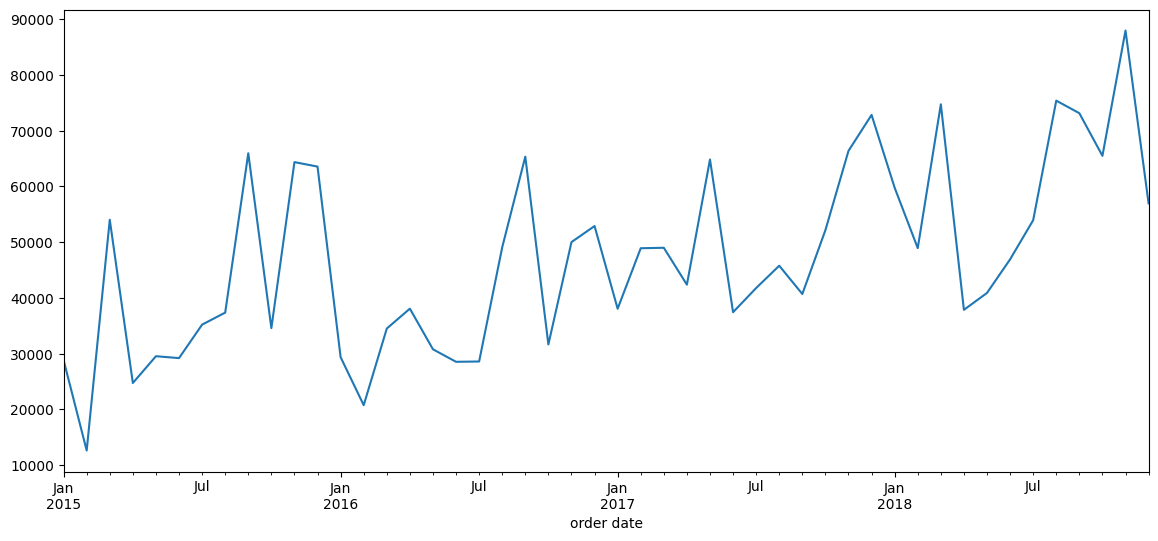

In [11]:
monthly_sales['sales'].plot(figsize=(14,6))

There is no seasonality but there is an increasing trend

## Time series Models

In [12]:
from statsmodels.tsa.stattools import adfuller
ad_test=adfuller(monthly_sales['sales'])
print(f'p-value: {ad_test[1]}')
if ad_test[1] < 0.05:
    print('we reject the null hypothesis, Data is stationary')
else:
    print('we fail to reject the null hypothesis, Data is non-stationary')

p-value: 0.6967631967119419
we fail to reject the null hypothesis, Data is non-stationary


In [13]:
monthly_sales['first_diff']= monthly_sales['sales'] - monthly_sales['sales'].shift(1)
monthly_sales['seasonal_first_diff']= monthly_sales['sales'] - monthly_sales['sales'].shift(12)
monthly_sales.head()

,sales,first_diff,seasonal_first_diff
order date,,,
2015-01-31,28828.254,NaN,NaN
2015-02-28,12588.484,-16239.770,NaN
2015-03-31,54027.692,41439.208,NaN
2015-04-30,24710.016,-29317.676,NaN
2015-05-31,29520.490,4810.474,NaN


In [14]:
ad_test=adfuller(monthly_sales['first_diff'].dropna())
print(f'p-value: {ad_test[1]}')
if ad_test[1] < 0.05:
    print('we reject the null hypothesis, Data is stationary')
else:
    print('we fail to reject the null hypothesis, Data is non-stationary')

p-value: 0.001532757823373631
we reject the null hypothesis, Data is stationary


here we get the d value for arima model as 1 as we the data becomes stationary after first order differencing

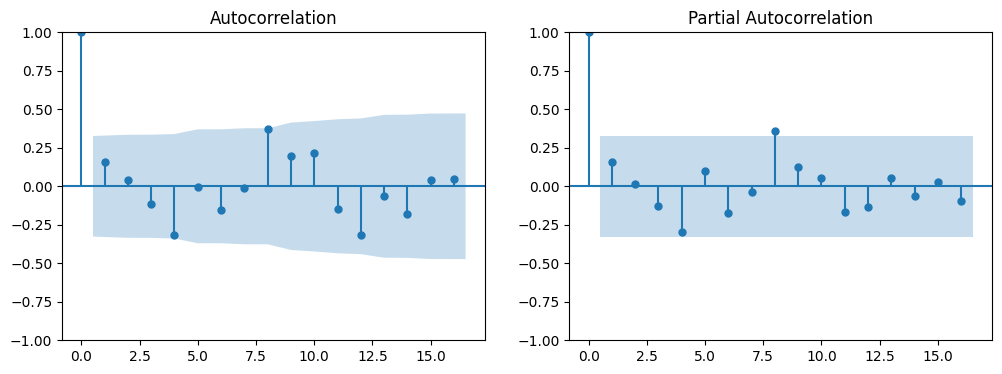

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(121)
fig=plot_acf(monthly_sales['seasonal_first_diff'].dropna(), lags=16, ax=ax1)
ax2=fig.add_subplot(122)
fig=plot_pacf(monthly_sales['seasonal_first_diff'].dropna(), lags=16, ax=ax2)

here we get p and q values as 0,0

In [16]:
monthly_sales.shape

(48, 3)

In [17]:
X=monthly_sales[['sales']]
X_train=X[:-7]

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sr_model = SARIMAX(monthly_sales['sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
fitted_model = sr_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.19196D+00    |proj g|=  4.34701D-01

At iterate    5    f=  8.03472D+00    |proj g|=  2.09545D-02

At iterate   10    f=  8.02955D+00    |proj g|=  3.57337D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     13      1     0     0   1.887D-05   8.030D+00
  F =   8.0295544803170760     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<Axes: xlabel='order date'>

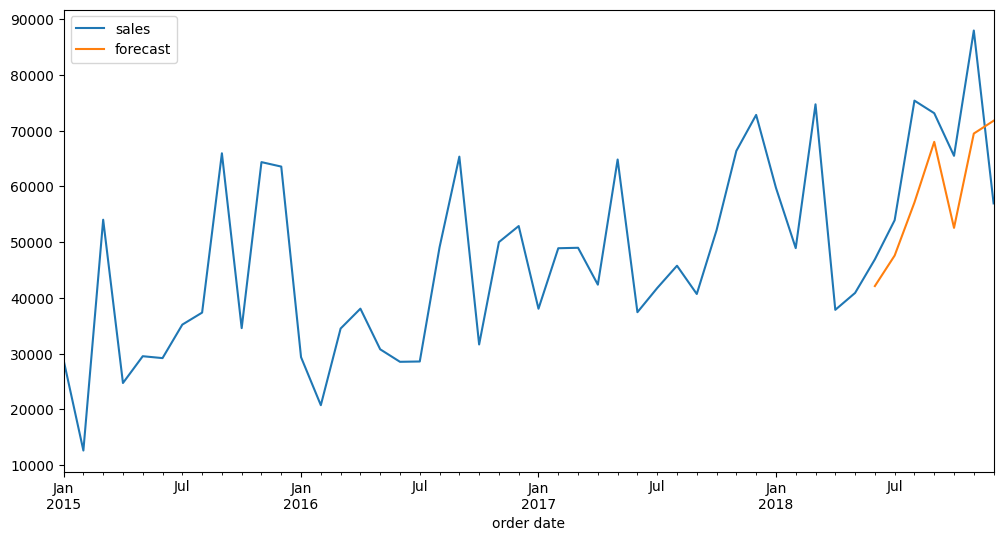

In [19]:
monthly_sales['forecast']=fitted_model.predict(start=-7, end=-1, dynamic=True)
monthly_sales[['sales', 'forecast']].plot(figsize=[12,6])

In [20]:
monthly_sales.tail()

,sales,first_diff,seasonal_first_diff,forecast
order date,,,,
2018-08-31,75408.7840,21466.0085,29641.9696,57127.659549
2018-09-30,73153.3640,-2255.4200,32461.0577,68008.024707
2018-10-31,65501.1622,-7652.2018,13344.2042,52565.073235
2018-11-30,87997.6400,22496.4778,21605.0930,69500.029244
2018-12-31,56959.2358,-31038.4042,-15887.8497,71795.881286


In [21]:
data={'date': ['2019-01-31', '2019-02-28','2019-03-31', '2019-4-30', '2019-05-31', '2019-06-30', '2019-07-31']}
future_dates = pd.DataFrame(data)
future_dates

,date
0,2019-01-31
1,2019-02-28
2,2019-03-31
3,2019-4-30
4,2019-05-31
5,2019-06-30
6,2019-07-31


In [22]:
future_dates['datetime'] = future_dates['date'].astype('datetime64[ns]')
future_dates.drop('date', axis=1, inplace= True)
future_dates.set_index('datetime', inplace=True)
future_dates

""
datetime
2019-01-31
2019-02-28
2019-03-31
2019-04-30
2019-05-31
2019-06-30
2019-07-31


In [23]:
future_df=pd.concat([monthly_sales, future_dates])
future_df.tail(10)

,sales,first_diff,seasonal_first_diff,forecast
2018-10-31,65501.1622,-7652.2018,13344.2042,52565.073235
2018-11-30,87997.6400,22496.4778,21605.0930,69500.029244
2018-12-31,56959.2358,-31038.4042,-15887.8497,71795.881286
2019-01-31,NaN,NaN,NaN,NaN
2019-02-28,NaN,NaN,NaN,NaN
2019-03-31,NaN,NaN,NaN,NaN
2019-04-30,NaN,NaN,NaN,NaN
2019-05-31,NaN,NaN,NaN,NaN
2019-06-30,NaN,NaN,NaN,NaN
2019-07-31,NaN,NaN,NaN,NaN


In [24]:
future_forecast = fitted_model.get_forecast(steps=7)
forecast_values = future_forecast.predicted_mean
forecast_values

2019-01-31    57539.320545
2019-02-28    57979.358575
2019-03-31    73909.432517
2019-04-30    59215.794339
2019-05-31    66609.089917
2019-06-30    58846.492436
2019-07-31    62913.502776
Freq: ME, Name: predicted_mean, dtype: float64

In [25]:
future_df['future_forecast']=forecast_values
future_df.tail(10)

,sales,first_diff,seasonal_first_diff,forecast,future_forecast
2018-10-31,65501.1622,-7652.2018,13344.2042,52565.073235,NaN
2018-11-30,87997.6400,22496.4778,21605.0930,69500.029244,NaN
2018-12-31,56959.2358,-31038.4042,-15887.8497,71795.881286,NaN
2019-01-31,NaN,NaN,NaN,NaN,57539.320545
2019-02-28,NaN,NaN,NaN,NaN,57979.358575
2019-03-31,NaN,NaN,NaN,NaN,73909.432517
2019-04-30,NaN,NaN,NaN,NaN,59215.794339
2019-05-31,NaN,NaN,NaN,NaN,66609.089917
2019-06-30,NaN,NaN,NaN,NaN,58846.492436
2019-07-31,NaN,NaN,NaN,NaN,62913.502776


<Axes: >

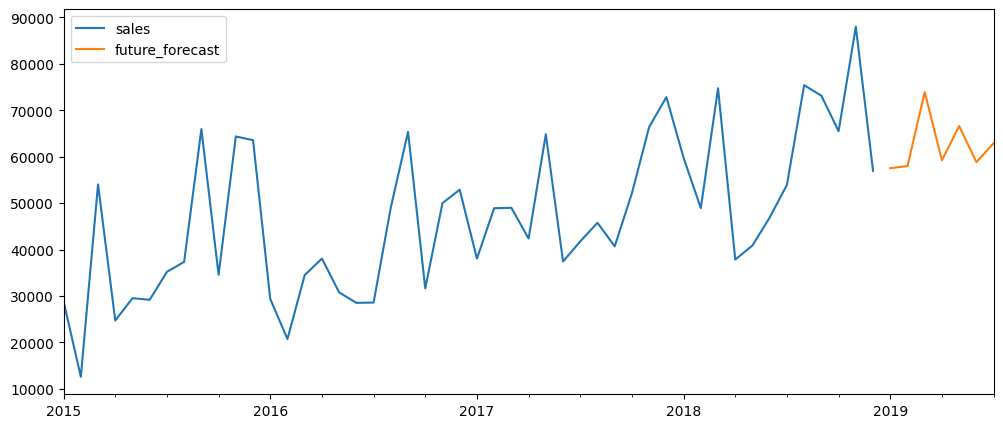

In [26]:
future_df[['sales', 'future_forecast']].plot(figsize=(12, 5))